In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sb

In [2]:
v_data=pd.read_table("Vertebral.dat", sep="\s+", header=None)
v_data.columns=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spon','class']
v_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spon,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,DH


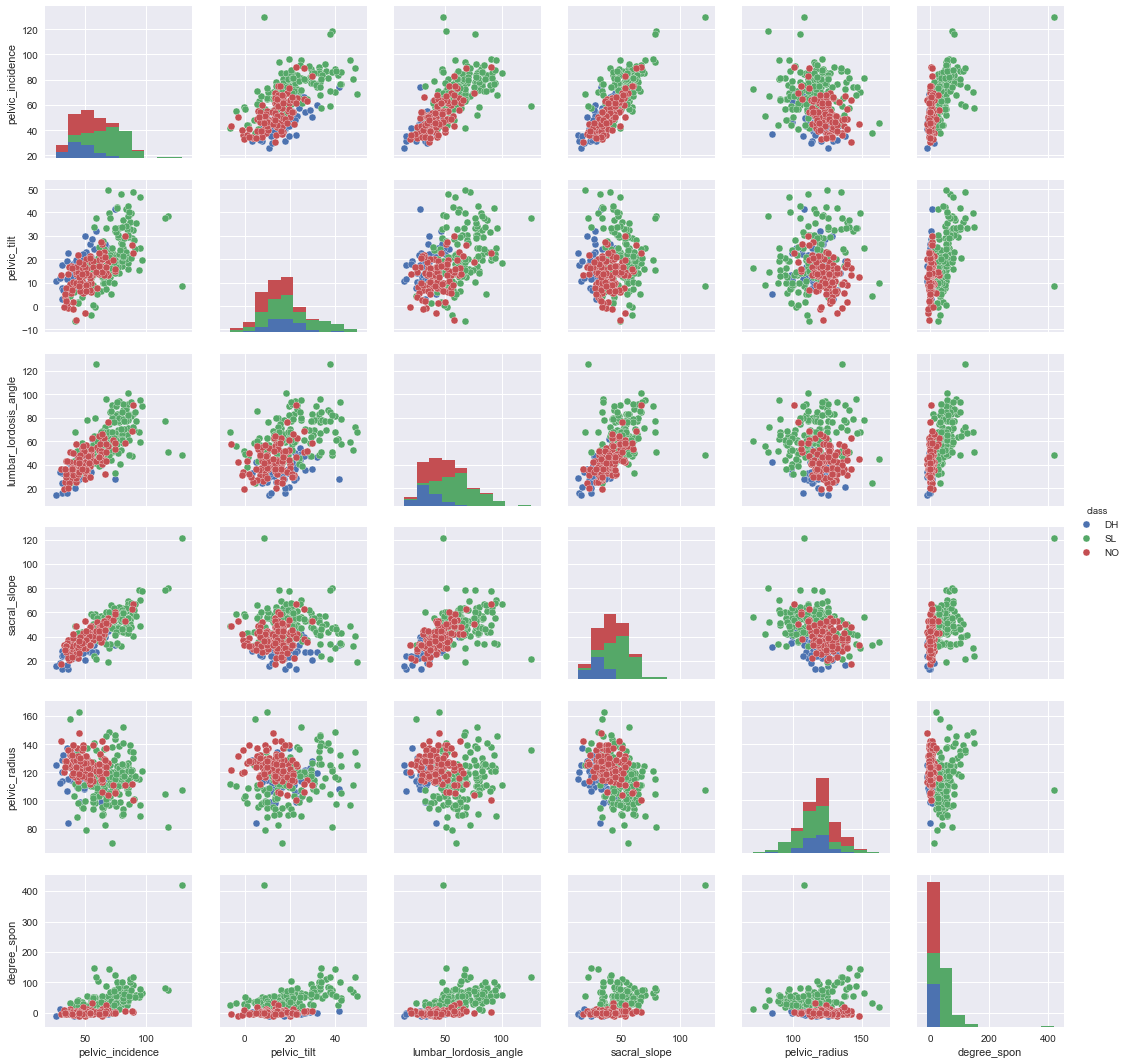

In [3]:
sb.pairplot(v_data,hue='class')

In [4]:
X, y = v_data.iloc[:, [2, 3]].values, v_data['class']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(X)

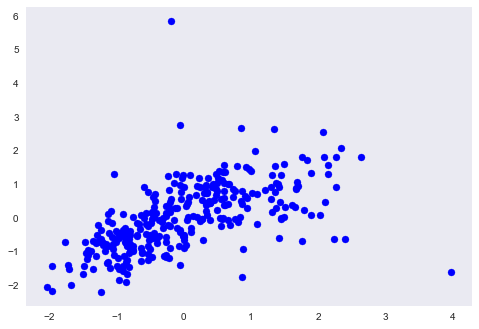

In [5]:
plt.scatter(X_std[:,0],X_std[:,1],c='blue',marker='o')
plt.grid()
plt.show()

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X_std)

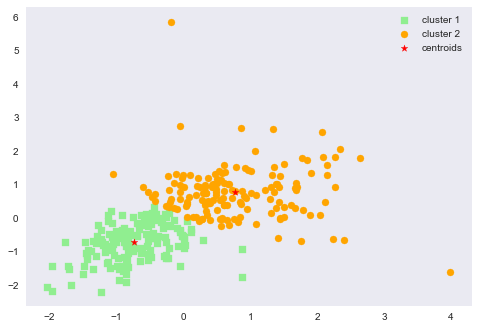

In [7]:
plt.scatter(X_std[y_km==0,0],X_std[y_km ==0,1],c='lightgreen',marker='s',label='cluster 1')
plt.scatter(X_std[y_km ==1,0],X_std[y_km ==1,1],c='orange',marker='o',label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',c='red',label='centroids')
plt.legend()
plt.grid()
plt.show()

In [8]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 269.96


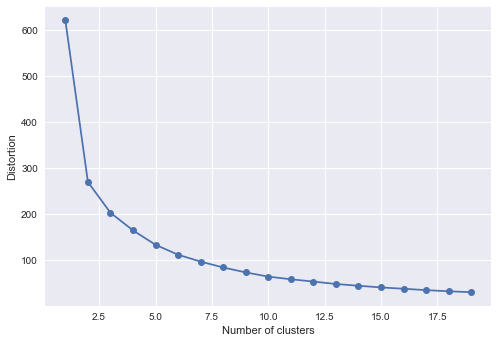

In [9]:
distortions = []
for i in range(1, 20):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X_std)
    distortions.append(km.inertia_)
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

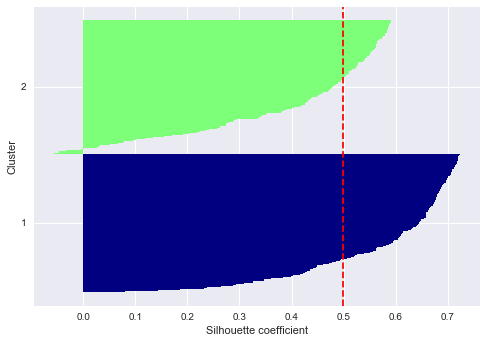

In [10]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_std,y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [15]:
X1, y1 = v_data.iloc[:, :6].values, v_data['class']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X1_std=sc.fit_transform(X1)

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X1_std)

In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X1, y1, test_size=0.3, random_state=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
y_km = km.fit_predict(X_train)

In [22]:
km.score(X_test)

-95407.92076430883